In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diamonds(2).csv')

#EDA

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df = df.drop('Unnamed: 0', axis=1)

##ESPLORAZIONE TARGET

TARGET = price

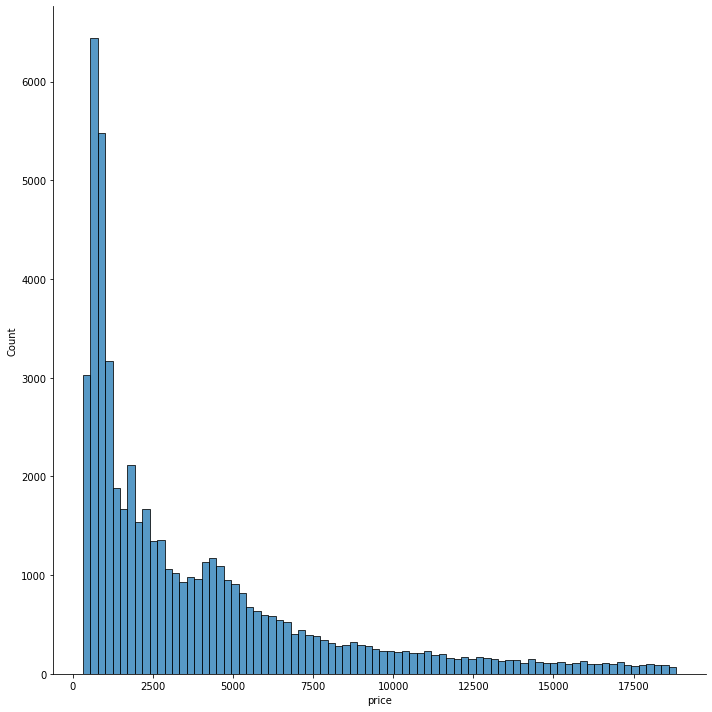

In [9]:
target_name = df['price']
sns.displot(target_name, height=10)
plt.show()

In [10]:
print('Skewness:', target_name.skew())
print('Kurtosis:', target_name.kurt())

Skewness: 1.618395283383529
Kurtosis: 2.17769575924869


##ESPLORAZIONE RELAZIONI FEATURES CON TARGET

###FEATURES NUMERICHE

CARAT VS PRICE

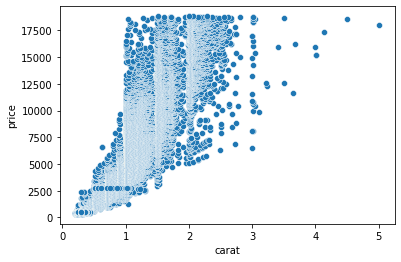

In [18]:
sns.scatterplot(x='carat' , y='price', data=df);

DEPTH VS PRICE

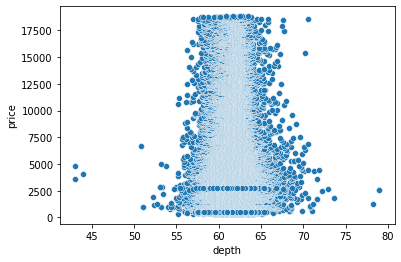

In [11]:
sns.scatterplot(x='depth' , y='price', data=df);

TABLE VS PRICE

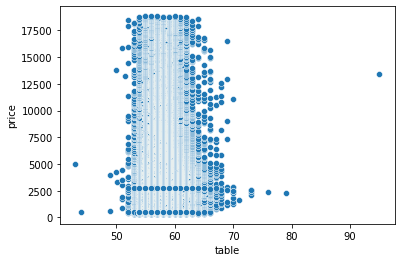

In [12]:
sns.scatterplot(x='table' , y='price', data=df);

X VS PRICE

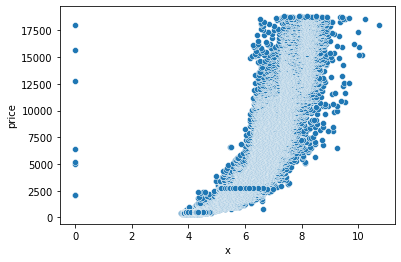

In [13]:
sns.scatterplot(x='x' , y='price', data=df);

Y VS PRICE

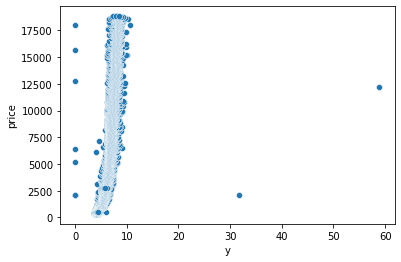

In [14]:
sns.scatterplot(x='y' , y='price', data=df);

Z VS PRICE

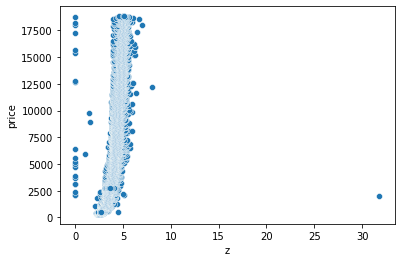

In [15]:
sns.scatterplot(x='z' , y='price', data=df);

MATRICE DI CORRELAZIONE

In [16]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


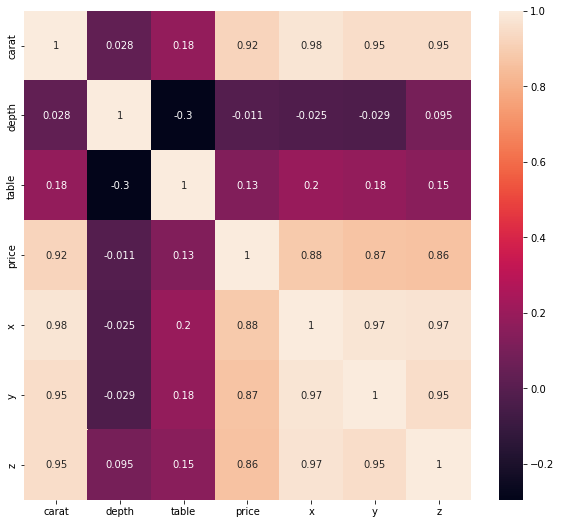

In [17]:
corr_matrix = df.corr()

plt.figure(figsize=(10,9))
sns.heatmap(corr_matrix, annot=True)     
plt.show()

BARPLOT

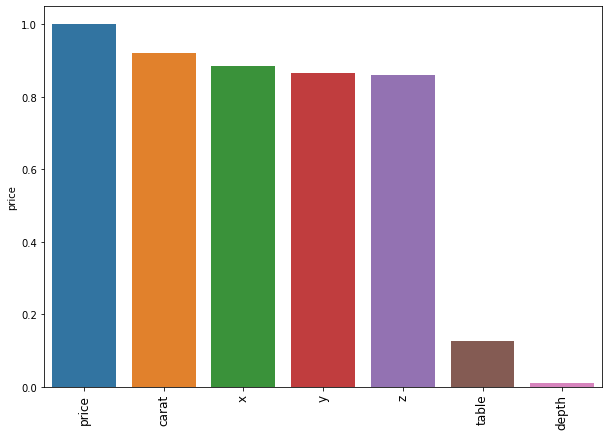

In [18]:
price_corr = corr_matrix['price'].abs().sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=price_corr.index, y=price_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

PAIRPLOT

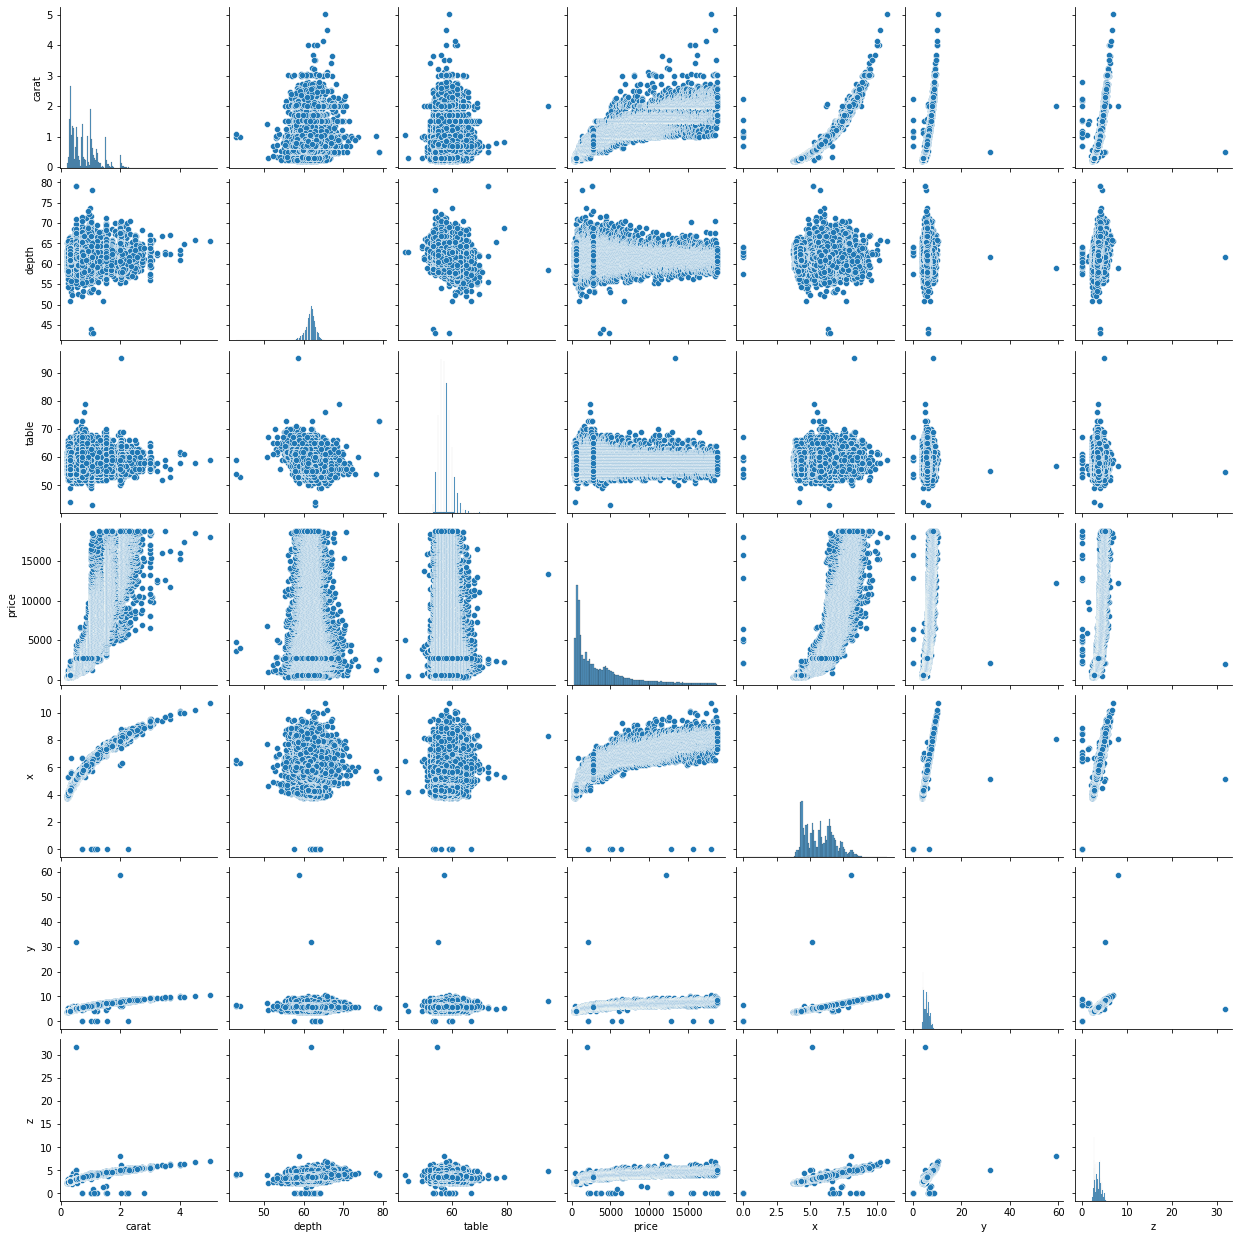

In [19]:
sns.pairplot(data=df);

###FEATURES CATEGORICHE

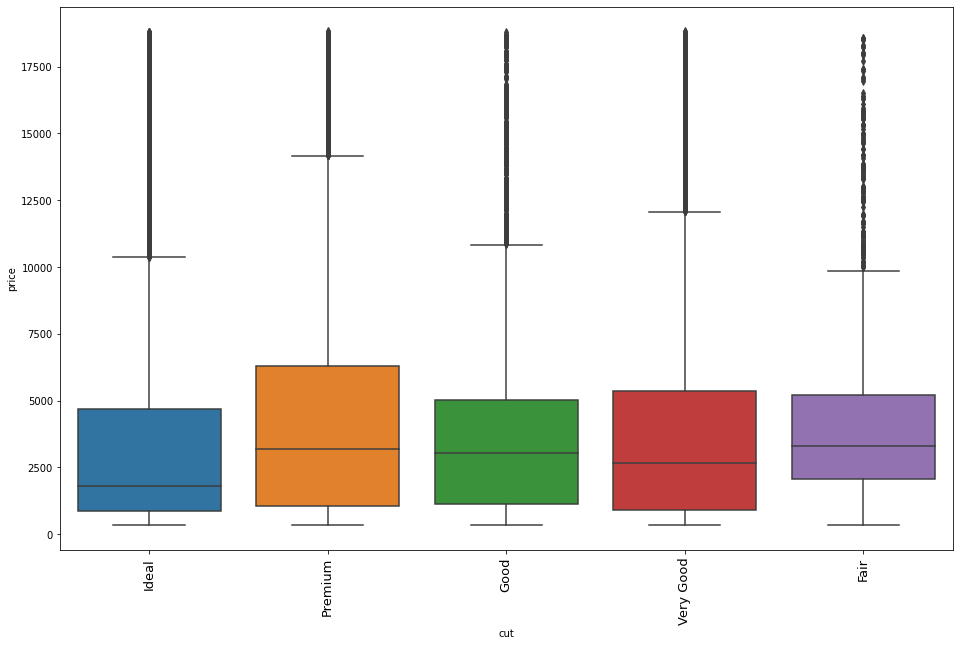

In [21]:
plt.figure(figsize=(16,10))
sns.boxplot(x='cut',y=target_name, data=df)
plt.xticks(rotation=90, fontsize=13);

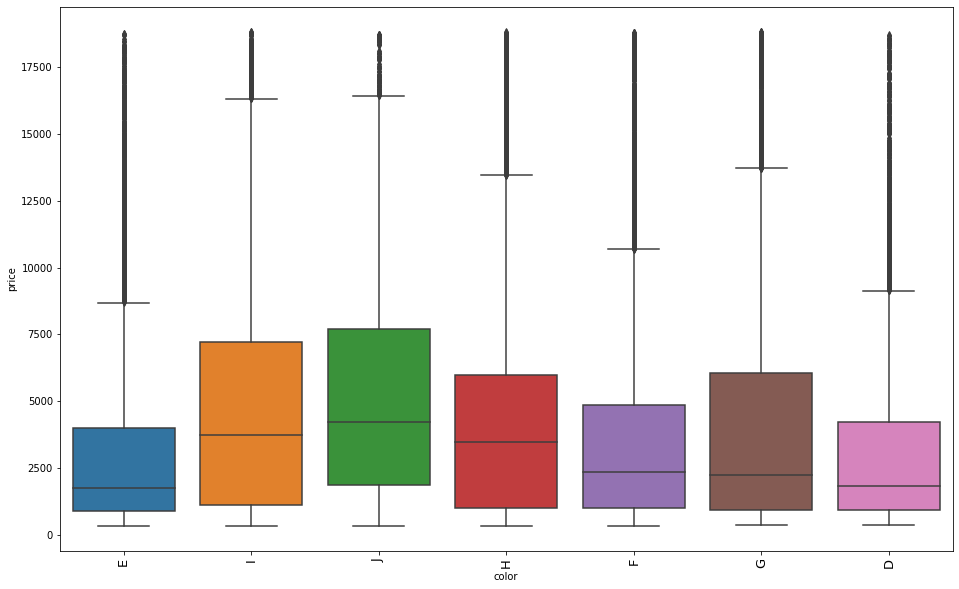

In [22]:
plt.figure(figsize=(16,10))
sns.boxplot(x='color',y=target_name, data=df)
plt.xticks(rotation=90, fontsize=13);

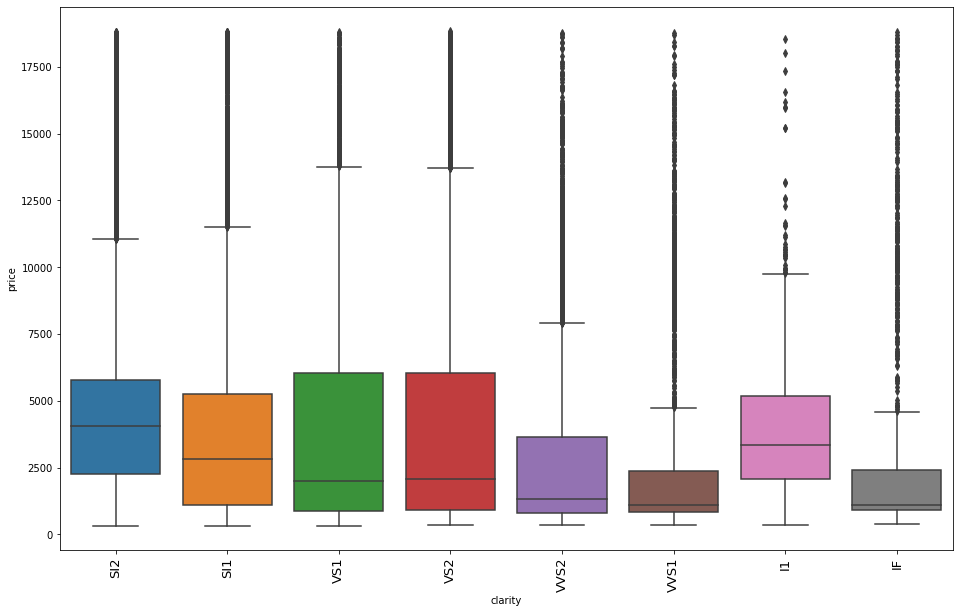

In [23]:
plt.figure(figsize=(16,10))
sns.boxplot(x='clarity',y=target_name, data=df)
plt.xticks(rotation=90, fontsize=13);

#DOMANDE

NB= & and; | or

##qual è il prezzo medio dei diamanti che hanno una x > 3?

In [21]:
cond1 = df['x']>3
cond1

0        True
1        True
2        True
3        True
4        True
         ... 
53935    True
53936    True
53937    True
53938    True
53939    True
Name: x, Length: 53940, dtype: bool

In [22]:
df[cond1]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [23]:
df[cond1]['price'].mean()

3932.136078765853

##qual è il prezzo medio dei diamanti che hanno una x che sta tra 3 e 7?

In [19]:
cond1 = df['x']>3
cond2 = df['x']<7

df[cond1 & cond2]['price'].mean()

2727.8680588310963

##che depth media hanno i diamanti di prezzo superiore a 2000?

In [24]:
cond3 = df['price']>2000

df[cond3]['depth'].mean()

61.777530017152934

##plot della distibuzione di depth per i prezzi superiori a 2000

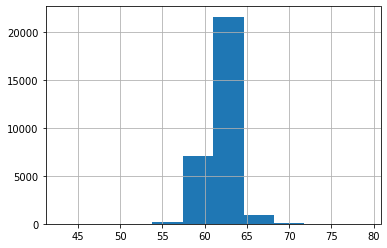

In [25]:
cond3 = df['price']>2000

df[cond3]['depth'].hist()

OPPURE

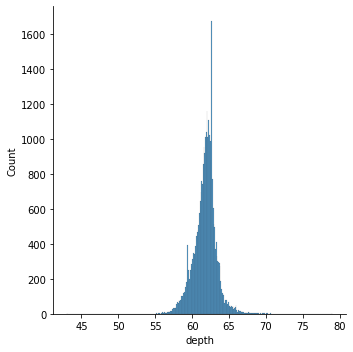

In [26]:
cond3 = df['price']>2000

sns.displot(df[cond3]['depth'])

##qual è la caratura media (carat) dei diamanti che hanno o x>3 o y<7

In [27]:
cond4= df['x']>3
cond5= df['y']<7

df[cond4 | cond5]['carat'].mean()

0.7979397478679852

##qual è la media del volume dei diamanti che hanno un prezzo sopra la deviazione standard?

In [28]:
df['volume'] = df['x']*df['y']*df['z']

In [30]:
cond= df['price']>(df['price'].mean()+df['price'].std())
df[cond]['volume'].mean()

262.54520014880075